<a href="https://colab.research.google.com/github/Akshay069/E-Ccommerce-Financial-Data-Reconciliation/blob/main/CoinTab_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title** : Cointab Assignment on Data Reconciliation.

```



###**Steps Followed :**

---
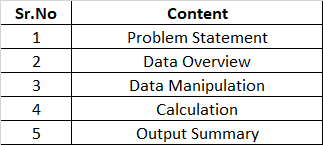

###**1. Problem Statement**
---
You are a data analyst and your client has a large ecommerce company in India (let’s call it X).
X gets a thousand orders via their website on a daily basis and they have to deliver them as fast
as they can. For delivering the goods ordered by the customers, X has tied up with multiple
courier companies in India as delivery partners who charge them some amount per delivery.

The charges are dependent upon two factors:\
● Weight of the product\
● Distance between the warehouse (pickup location) and customer’s delivery address (destination location) \

On an average, the delivery charges are Rs. 100 per shipment. So if X ships 1,00,000 orders
per month, they have to pay approximately Rs. 1 crore to the courier companies on a monthly
basis as charges.
As the amount that X has to pay to the courier companies is very high, they want to verify if the
charges levied by their Delivery partners per Order are correct.

**My Approch to the problem**\
As per above problem statment fisrt will make a invoice report for X company just the way courier company invoice sheet. With help of detailed problem statement will calulate the slab weight, expected charges and their differences. After getting all calculated fields will make summary with correctly,over,under charged order with their count and amount(Absolute Amount).

###**2. Data Overview**

In [ ]:
# Importing important liabraries.
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
# Reading Company-x pincode zones sheet using pandas.
pincode_x = pd.read_excel('/content/drive/MyDrive/CoinTab/Cointab Data Analyst - Challenge/Company X - Pincode Zones.xlsx')
pincode_x.info()
pincode_x.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Warehouse Pincode  124 non-null    int64 
 1   Customer Pincode   124 non-null    int64 
 2   Zone               124 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.0+ KB


,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d


In [ ]:
# Rename the columns as per requirement.
pincode_x.rename(columns={'Zone':'Delivery Zone as per X'}, inplace=True)
pincode_x.head(1)

,Warehouse Pincode,Customer Pincode,Delivery Zone as per X
0,121003,507101,d


In [ ]:
# Reading Courier Company Invoice sheet using pandas.
courier_comp_invoice = pd.read_excel('/content/drive/MyDrive/CoinTab/Cointab Data Analyst - Challenge/Courier Company - Invoice.xlsx')
courier_comp_invoice.info()
courier_comp_invoice.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AWB Code              124 non-null    int64  
 1   Order ID              124 non-null    int64  
 2   Charged Weight        124 non-null    float64
 3   Warehouse Pincode     124 non-null    int64  
 4   Customer Pincode      124 non-null    int64  
 5   Zone                  124 non-null    object 
 6   Type of Shipment      124 non-null    object 
 7   Billing Amount (Rs.)  124 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4


In [ ]:
# Rename the colummns as per requirement.
courier_comp_invoice.rename(columns={'Zone':'Delivery Zone charged by Courier Company',
                                     'Charged Weight':'Total weight as per Courier Company (KG)',
                                     'Billing Amount':'Charges Billed by Courier Company (Rs.)'}, inplace=True)
courier_comp_invoice.head(1)

,AWB Code,Order ID,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.3,121003,507101,d,Forward charges,135.0


In [ ]:
# Reading Compnay X - Order Report table using pandas.
x_order = pd.read_excel('/content/drive/MyDrive/CoinTab/Cointab Data Analyst - Challenge/Company X - Order Report.xlsx')
x_order.info()
x_order.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExternOrderNo  400 non-null    int64  
 1   SKU            400 non-null    object 
 2   Order Qty      400 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.5+ KB


,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0


In [ ]:
# Rename column as per requirement.
x_order.rename(columns={'ExternOrderNo':'Order ID'}, inplace=True)
x_order.head(1)

,Order ID,SKU,Order Qty
0,2001827036,8904223818706,1.0


In [ ]:
# Reading the table Company X - SKU Master using pandas DataFrame.
x_sku_master = pd.read_excel('/content/drive/MyDrive/CoinTab/Cointab Data Analyst - Challenge/Company X - SKU Master.xlsx')
x_sku_master.info()
x_sku_master.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SKU         66 non-null     object
 1   Weight (g)  66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


In [ ]:
# Reading Courier Company Rates sheet using pandas.
courier_comp_rates = pd.read_excel('/content/drive/MyDrive/CoinTab/Cointab Data Analyst - Challenge/Courier Company - Rates.xlsx')
courier_comp_rates.info()
courier_comp_rates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fwd_a_fixed       1 non-null      float64
 1   fwd_a_additional  1 non-null      float64
 2   fwd_b_fixed       1 non-null      int64  
 3   fwd_b_additional  1 non-null      float64
 4   fwd_c_fixed       1 non-null      float64
 5   fwd_c_additional  1 non-null      float64
 6   fwd_d_fixed       1 non-null      float64
 7   fwd_d_additional  1 non-null      float64
 8   fwd_e_fixed       1 non-null      float64
 9   fwd_e_additional  1 non-null      float64
 10  rto_a_fixed       1 non-null      float64
 11  rto_a_additional  1 non-null      float64
 12  rto_b_fixed       1 non-null      float64
 13  rto_b_additional  1 non-null      float64
 14  rto_c_fixed       1 non-null      float64
 15  rto_c_additional  1 non-null      float64
 16  rto_d_fixed       1 non-null      float64
 17  r

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


###**3. Data Manipulation**

In [ ]:
# Merging Company X - order report with Company X - SKU master 
df_order_sku = pd.merge(x_order,x_sku_master, how='left', on='SKU')
df_order_sku.info()
df_order_sku.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 400
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order ID    401 non-null    int64  
 1   SKU         401 non-null    object 
 2   Order Qty   401 non-null    float64
 3   Weight (g)  401 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.7+ KB


,Order ID,SKU,Order Qty,Weight (g)
0,2001827036,8904223818706,1.0,127
1,2001827036,8904223819093,1.0,150
2,2001827036,8904223819109,1.0,100
3,2001827036,8904223818430,1.0,165
4,2001827036,8904223819277,1.0,350


In [ ]:
# As we only need unique customer pincodes, I'm droping duplicate values.
df_pincode_x = pincode_x.drop_duplicates(subset='Customer Pincode')

# assign required data to the new variable.
df_Courier_invoice = courier_comp_invoice[['Order ID','Customer Pincode','Type of Shipment']]

In [ ]:
# Combining courier invoice with X pincode.
df_comp_1 = df_Courier_invoice.merge(df_pincode_x, on='Customer Pincode')
df_comp_1.head(2)

,Order ID,Customer Pincode,Type of Shipment,Warehouse Pincode,Delivery Zone as per X
0,2001806232,507101,Forward charges,121003,d
1,2001806273,486886,Forward charges,121003,d


In [ ]:
# Merging new df with SKU sheet.
df_comp_2 = df_order_sku.merge(df_comp_1, on='Order ID')
df_comp_2.head(2)

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Delivery Zone as per X
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e


In [ ]:
# Rename columns for further string calculation
df_comp_2.rename(columns={'Order Qty':'Order_Qty','Weight (g)':'Weight_g'},inplace=True)

In [ ]:
# Using eval function for calculation as our values are in string format.
convert_gram_to_kg = "Total_weight=(Order_Qty*Weight_g)/1000"
df_comp_2.eval(convert_gram_to_kg, inplace=True)

In [ ]:
# Let's have a look at the new df.
df_comp_2.head(5)

,Order ID,SKU,Order_Qty,Weight_g,Customer Pincode,Type of Shipment,Warehouse Pincode,Delivery Zone as per X,Total_weight
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350


In [ ]:
# Renaming columns as per requirement.
df_comp_2.rename(columns={'Order_Qty':'Order Qty','Weight_g':'Weight (g)','Total_weight':'Total weight as per X (KG)'}, inplace=True)
df_comp_2.head(1)

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Delivery Zone as per X,Total weight as per X (KG)
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127


###**4. Calulation**

In [ ]:
# Function for weight slab calculation.
def slab_weight(weight):
    x=round(weight%1,1)
    if x==0.0:
        return weight
    elif x>0.5:
        return int(weight)+1.0
    else:
        return int(weight)+0.5

In [ ]:
# Applying slab weight to both X company and courier company data.
df_comp_2['Weight slab as per X (KG)'] = df_comp_2['Total weight as per X (KG)'].apply(slab_weight)
courier_comp_invoice['Weight slab charged by Courier Company (KG)'] = courier_comp_invoice['Total weight as per Courier Company (KG)'].apply(slab_weight)

In [ ]:
# Let's check for the updated slab weight column.
df_comp_2.head(5)

,Order ID,SKU,Order Qty,Weight (g),Customer Pincode,Type of Shipment,Warehouse Pincode,Delivery Zone as per X,Total weight as per X (KG),Weight slab as per X (KG)
0,2001827036,8904223818706,1.0,127,173213,Forward charges,121003,e,0.127,0.5
1,2001827036,8904223819093,1.0,150,173213,Forward charges,121003,e,0.150,0.5
2,2001827036,8904223819109,1.0,100,173213,Forward charges,121003,e,0.100,0.5
3,2001827036,8904223818430,1.0,165,173213,Forward charges,121003,e,0.165,0.5
4,2001827036,8904223819277,1.0,350,173213,Forward charges,121003,e,0.350,0.5


In [ ]:
# Let's check for the updated slab weight column.
courier_comp_invoice.head(5)

,AWB Code,Order ID,Total weight as per Courier Company (KG),Warehouse Pincode,Customer Pincode,Delivery Zone charged by Courier Company,Type of Shipment,Billing Amount (Rs.),Weight slab charged by Courier Company (KG)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,1.5
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,1.0
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2.5
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,1.0
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,0.5


In [ ]:
# Checking unique value cound to unsure the calculation.
courier_comp_invoice['Weight slab charged by Courier Company (KG)'].value_counts()

1.00    65
0.50    23
1.50    17
2.00     7
2.50     5
3.00     4
1.02     1
4.50     1
1.04     1
Name: Weight slab charged by Courier Company (KG), dtype: int64

In [ ]:
# Calcualtion Expected charges as per X Company.
total_expected_charges = []
for i in range(len(df_comp_2)):
  # Forward Categorie of rates
  fwd_category = 'fwd_'+df_comp_2['Delivery Zone as per X'][i]
  fwd_fixed = courier_comp_rates[fwd_category +'_fixed'][0]
  fwd_additional = courier_comp_rates[fwd_category +'_additional'][0]

  # RTO categories of rated
  rto_category = 'rto_'+df_comp_2['Delivery Zone as per X'][i]
  rto_fixed = courier_comp_rates[rto_category+'_fixed'][0]
  rto_additional = courier_comp_rates[rto_category+'_additional'][0]

  # Expected rates for Forward charges.
  if df_comp_2['Type of Shipment'][i] == 'Forward charges':
    if df_comp_2['Weight slab as per X (KG)'][i] <= 0.5:
      total_expected_charges.append(fwd_fixed)  
    else:
      additional_weight = (df_comp_2['Weight slab as per X (KG)'][i] - 0.5)/0.5
      total_expected_charges.append(fwd_fixed + additional_weight*fwd_additional)

  # Expected weight for Forward and RTO charges.
  if df_comp_2['Type of Shipment'][i] == 'Forward and RTO charges':
    if df_comp_2['Weight slab as per X (KG)'][i] <= 0.5:
      total_expected_charges.append(fwd_fixed + rto_fixed)
    else:
      additional_weight = (df_comp_2['Weight slab as per X (KG)'][i] - 0.5)/0.5
      total_expected_charges.append(fwd_fixed + additional_weight*(fwd_additional + rto_additional))

# Adding total expected charges to the df  
df_comp_2['Expected Charge as per X (Rs.)'] = total_expected_charges

In [ ]:
# Checkign for the required column as per problem statement.
df_comp_2.columns

Index(['Order ID', 'SKU', 'Order Qty', 'Weight (g)', 'Customer Pincode',
       'Type of Shipment', 'Warehouse Pincode', 'Delivery Zone as per X',
       'Total weight as per X (KG)', 'Weight slab as per X (KG)',
       'Expected Charge as per X (Rs.)'],
      dtype='object')

In [ ]:
# Adding only required columns to the df.
expected_result_x = df_comp_2[['Order ID','Type of Shipment','Delivery Zone as per X',
                             'Total weight as per X (KG)', 'Weight slab as per X (KG)',
                             'Expected Charge as per X (Rs.)']]

In [ ]:
# Checking courier compnay invoice data columns.
courier_comp_invoice.columns

Index(['AWB Code', 'Order ID', 'Total weight as per Courier Company (KG)',
       'Warehouse Pincode', 'Customer Pincode',
       'Delivery Zone charged by Courier Company', 'Type of Shipment',
       'Billing Amount (Rs.)', 'Weight slab charged by Courier Company (KG)'],
      dtype='object')

In [ ]:
# Adding only required columns from courier company invoice as per problem statement.
expected_result_courier = courier_comp_invoice[['AWB Code','Order ID','Total weight as per Courier Company (KG)',
                                                'Delivery Zone charged by Courier Company',
                                                'Weight slab charged by Courier Company (KG)','Billing Amount (Rs.)']]

In [ ]:
# Comabing\merging Courier company invoice with X Company invoice for comparison.
expected_result = expected_result_x.merge(expected_result_courier, on='Order ID', how='left')
expected_result.head(5)

,Order ID,Type of Shipment,Delivery Zone as per X,Total weight as per X (KG),Weight slab as per X (KG),Expected Charge as per X (Rs.),AWB Code,Total weight as per Courier Company (KG),Delivery Zone charged by Courier Company,Weight slab charged by Courier Company (KG),Billing Amount (Rs.)
0,2001827036,Forward charges,e,0.127,0.5,56.6,1091122418320,1.6,b,2.0,117.9
1,2001827036,Forward charges,e,0.150,0.5,56.6,1091122418320,1.6,b,2.0,117.9
2,2001827036,Forward charges,e,0.100,0.5,56.6,1091122418320,1.6,b,2.0,117.9
3,2001827036,Forward charges,e,0.165,0.5,56.6,1091122418320,1.6,b,2.0,117.9
4,2001827036,Forward charges,e,0.350,0.5,56.6,1091122418320,1.6,b,2.0,117.9


In [ ]:
# Rename column name for the further calculations.
expected_result.rename(columns={'AWB Code':'AWB Number','Billing Amount (Rs.)':'Charges_Billed_by_Courier_Company_Rs','Expected Charge as per X (Rs.)':'Expected_Charges_as_per_X_Rs'}, inplace=True)
expected_result.head(5)

,Order ID,Type of Shipment,Delivery Zone as per X,Total weight as per X (KG),Weight slab as per X (KG),Expected_Charges_as_per_X_Rs,AWB Number,Total weight as per Courier Company (KG),Delivery Zone charged by Courier Company,Weight slab charged by Courier Company (KG),Charges_Billed_by_Courier_Company_Rs
0,2001827036,Forward charges,e,0.127,0.5,56.6,1091122418320,1.6,b,2.0,117.9
1,2001827036,Forward charges,e,0.150,0.5,56.6,1091122418320,1.6,b,2.0,117.9
2,2001827036,Forward charges,e,0.100,0.5,56.6,1091122418320,1.6,b,2.0,117.9
3,2001827036,Forward charges,e,0.165,0.5,56.6,1091122418320,1.6,b,2.0,117.9
4,2001827036,Forward charges,e,0.350,0.5,56.6,1091122418320,1.6,b,2.0,117.9


In [ ]:
# Calculating difference between expected charges as per X Company and Billed charges as per courier company.
difference = "Difference_Between_Expected_Charges_and_Billed_Charges_Rs = (Expected_Charges_as_per_X_Rs - Charges_Billed_by_Courier_Company_Rs)"
expected_result.eval(difference, inplace=True)

In [ ]:
# Rename the final output df with suitable column name.
expected_result.rename(columns={'Expected_Charges_as_per_X_Rs':'Expected Charge as per X(Rs.)',
                                'Charges_Billed_by_Courier_Company_Rs':'Charges Billed by Courier Company (Rs.)',
                                'Difference_Between_Expected_Charges_and_Billed_Charges_Rs':'Difference Between Expected Charges and Billed Charges (Rs.)'},
                       inplace=True)

In [ ]:
# Lets check for the column names.
expected_result.head(5)

,Order ID,Type of Shipment,Delivery Zone as per X,Total weight as per X (KG),Weight slab as per X (KG),Expected Charge as per X(Rs.),AWB Number,Total weight as per Courier Company (KG),Delivery Zone charged by Courier Company,Weight slab charged by Courier Company (KG),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,Forward charges,e,0.127,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3
1,2001827036,Forward charges,e,0.150,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3
2,2001827036,Forward charges,e,0.100,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3
3,2001827036,Forward charges,e,0.165,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3
4,2001827036,Forward charges,e,0.350,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3


In [ ]:
# Updating columns as per given in the expected result sheet.
expected_result.drop(['Type of Shipment'], axis=1, inplace=True)
expected_result.head(5)

,Order ID,Delivery Zone as per X,Total weight as per X (KG),Weight slab as per X (KG),Expected Charge as per X(Rs.),AWB Number,Total weight as per Courier Company (KG),Delivery Zone charged by Courier Company,Weight slab charged by Courier Company (KG),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001827036,e,0.127,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3
1,2001827036,e,0.150,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3
2,2001827036,e,0.100,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3
3,2001827036,e,0.165,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3
4,2001827036,e,0.350,0.5,56.6,1091122418320,1.6,b,2.0,117.9,-61.3


###**5. Summarizing Output**

In [ ]:
# Calculating summary for correctly changed orders.
correctly_charged = expected_result[expected_result['Difference Between Expected Charges and Billed Charges (Rs.)']==0.0]
correctly = ['Total orders where X has been correctly charged',len(correctly_charged),sum(correctly_charged['Charges Billed by Courier Company (Rs.)'])]

# Calculationg summary for over charged orders.
over_charged = expected_result[expected_result['Difference Between Expected Charges and Billed Charges (Rs.)'] < 0.0]
over = ['Total Orders where X has been overcharged',len(over_charged),np.abs(sum(over_charged['Difference Between Expected Charges and Billed Charges (Rs.)']))]

# Calculationg summary for under charged orders.
under_charged = expected_result[expected_result['Difference Between Expected Charges and Billed Charges (Rs.)'] > 0.0]
under = ['Total Orders where X has been undercharged',len(under_charged),np.abs(sum(under_charged['Difference Between Expected Charges and Billed Charges (Rs.)']))]

In [ ]:
# Let's have a look at the final summary.
summary_output = pd.DataFrame([correctly,over,under], columns=['Description','Count','Amount'])
summary_output

,Description,Count,Amount
0,Total orders where X has been correctly charged,12,507.6
1,Total Orders where X has been overcharged,380,31737.5
2,Total Orders where X has been undercharged,9,165.2


In [ ]:
# Writing both the sheets to a single workbook using ExcelWriter function.
writer = pd.ExcelWriter('/content/drive/MyDrive/CoinTab/Cointab Data Analyst - Challenge/Expected_Result.xlsx', if_sheet_exists='replace',mode = 'a', engine = "openpyxl")
expected_result.to_excel(writer, sheet_name='Calculations')
calculations=writer.save()
summary_output.to_excel(writer, sheet_name='Summary')
Summary=writer.save()

In [ ]:
# Reading the saved excel file.
df_expected_result = pd.read_excel('/content/drive/MyDrive/CoinTab/Cointab Data Analyst - Challenge/Expected_Result.xlsx', sheet_name=['Calculations', 'Summary'])
df_expected_result['Calculations']

,Unnamed: 0,Order ID,Delivery Zone as per X,Total weight as per X (KG),Weight slab as per X (KG),Expected Charge as per X(Rs.),AWB Number,Total weight as per Courier Company (KG),Delivery Zone charged by Courier Company,Weight slab charged by Courier Company (KG),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,0,2001827036,e,0.127,0.5,56.6,1091122418320,1.60,b,2.0,117.9,-61.3
1,1,2001827036,e,0.150,0.5,56.6,1091122418320,1.60,b,2.0,117.9,-61.3
2,2,2001827036,e,0.100,0.5,56.6,1091122418320,1.60,b,2.0,117.9,-61.3
3,3,2001827036,e,0.165,0.5,56.6,1091122418320,1.60,b,2.0,117.9,-61.3
4,4,2001827036,e,0.350,0.5,56.6,1091122418320,1.60,b,2.0,117.9,-61.3
...,...,...,...,...,...,...,...,...,...,...,...,...
396,396,2001806229,d,0.133,0.5,45.4,1091117222080,0.71,d,1.0,90.2,-44.8
397,397,2001806229,d,0.240,0.5,45.4,1091117222080,0.71,d,1.0,90.2,-44.8
398,398,2001806226,d,0.480,0.5,45.4,1091117222065,0.68,d,1.0,90.2,-44.8
399,399,2001806210,b,0.120,0.5,33.0,1091117221940,2.92,b,3.0,174.5,-141.5


In [ ]:
# Final Summary.
df_expected_result['Summary']

,Unnamed: 0,Description,Count,Amount
0,0,Total orders where X has been correctly charged,12,507.6
1,1,Total Orders where X has been overcharged,380,31737.5
2,2,Total Orders where X has been undercharged,9,165.2
